# Contrasting SST for *Pseudodiaptomus pelagicus*
This notebook aims to present the contrasting nature of SST records for *Pseudodiaptomus pelagicus* in OBIS record v/s studies documenting their best survival temperature, and document the possible underlying sampling bias.

This research paper titled [Effects of temperature on reproduction and survival of the calanoid copepod
Pseudodiaptomus pelagicus](https://docs.rwu.edu/cgi/viewcontent.cgi?article=1159&context=fcas_fp#:~:text=Copepods%20cultured%20between%2024%E2%80%9330,recorded%20at%2028%20%C2%B0C) suggests the best temperature of their survival and growth is 26-30 C while SST distribution on OBIS data shows majority records between 20-25 C. I believe this anomaly might be due to sampling bias.

## installing and importing libraries

In [1]:
!pip install -q pyobis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams as rc
import seaborn as sns
from pyobis import occurrences

## fetching data
Let us first get information about the species *Pseudodiaptomus pelagicus*.

In [3]:
occurrences.lookup_taxon("Pseudodiaptomus pelagicus")

[{'id': 355182,
  'scientificName': 'Pseudodiaptomus pelagicus',
  'acceptedNameUsageID': '355182',
  'scientificNameAuthorship': 'Herrick, 1884',
  'rank': 'Species',
  'kingdom': 'Animalia',
  'phylum': 'Arthropoda',
  'class': 'Copepoda',
  'order': 'Calanoida',
  'family': 'Pseudodiaptomidae',
  'genus': 'Pseudodiaptomus',
  'species': 'Pseudodiaptomus pelagicus'}]

Now, we shall fetch the occurrence records.

In [4]:
q = occurrences.search(scientificname="Pseudodiaptomus pelagicus")

In [6]:
data = q.execute()
data

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 61/61
Fetched 61 records.


,rightsHolder,date_year,institutionID,scientificNameID,year,scientificName,dropped,fieldNumber,aphiaID,language,...,georeferenceVerificationStatus,recordedBy,locationID,georeferenceSources,dynamicProperties,preparations,sex,georeferenceRemarks,dataGeneralizations,county
0,The Huntsman Marine Science Centre and Fisheri...,2013.0,ARC,urn:lsid:marinespecies.org:taxname:157681,2013,Pseudodiaptomus pelagicus,False,Z79283,355182,En,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1981.0,NaN,urn:lsid:marinespecies.org:taxname:157681,1981,Pseudodiaptomus pelagicus,False,NaN,355182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:355182,NaN,Pseudodiaptomus pelagicus,False,NaN,355182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:157681,NaN,Pseudodiaptomus pelagicus,False,NaN,355182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1981.0,NaN,urn:lsid:marinespecies.org:taxname:157681,1981,Pseudodiaptomus pelagicus,False,NaN,355182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,1981.0,NaN,urn:lsid:marinespecies.org:taxname:157681,1981,Pseudodiaptomus pelagicus,False,NaN,355182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:157681,NaN,Pseudodiaptomus pelagicus,False,NaN,355182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,1981.0,NaN,urn:lsid:marinespecies.org:taxname:157681,1981,Pseudodiaptomus pelagicus,False,NaN,355182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,1981.0,NaN,urn:lsid:marinespecies.org:taxname:157681,1981,Pseudodiaptomus pelagicus,False,NaN,355182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, we have only 61 records for this particular species. This clearly signifies how less sampled this species is. Sampling Bias could be highly prevalent due to so less number of records.

## visualizing data

### 1. yearly distribution of records

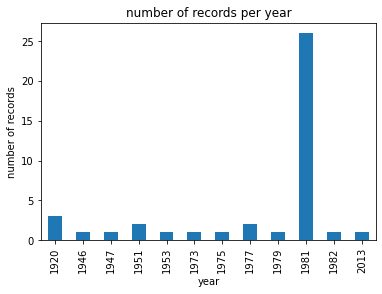

In [15]:
ax = data.groupby("year").scientificName.count().plot.bar()
ax.set_ylabel("number of records")
ax.set_title("number of records per year");

We can see a majority of additions in the year 1981 only. Sampling hasn't been done much before or after that year which is worrisome. Let us try to find the reason why there was a spike in 1981.

In [20]:
data[data["year"] == "1981"].dataset_id.unique()

array(['80479e14-2730-436d-acaa-b63bdc7dd06f'], dtype=object)

In [21]:
from pyobis import dataset

In [25]:
dataset.get(id="80479e14-2730-436d-acaa-b63bdc7dd06f").execute()

{'total': 1,
 'results': [{'id': '80479e14-2730-436d-acaa-b63bdc7dd06f',
   'url': 'https://www1.usgs.gov/obis-usa/ipt/resource?r=wod_2009',
   'archive': 'https://www1.usgs.gov/obis-usa/ipt/archive.do?r=wod_2009',
   'published': '2020-11-17T22:52:07.000Z',
   'created': '2020-11-17T23:39:18.651Z',
   'updated': '2022-06-23T18:34:05.864Z',
   'core': 'occurrence',
   'extensions': [],
   'statistics': {'Event': 0,
    'absence': 0,
    'dropped': 2444,
    'Occurrence': 3134870,
    'DNADerivedData': 0,
    'MeasurementOrFact': 0},
   'extent': 'POLYGON((-180 -78.4983,-180 89.9999008,180 89.9999008,180 -78.4983,-180 -78.4983))',
   'title': 'World Ocean Database 2009',
   'citation': "Baranova, O.K, T.D. O'Brien, T.P. Boyer and I.V. Smolyar (2009). Plankton data. Chapter 16 in Boyer, T. P., J. I. Antonov , O. K. Baranova, H. E. Garcia, D. R. Johnson, R. A. Locarnini, A. V. Mishonov, T. D. O'Brien, D. Seidov, I. V. Smolyar, M. M. Zweng, 2009. World Ocean Database 2009. S. Levitus, Ed.,

So, this is sources from the World ocean database and because of the diversity it addresses, depth of records might have been compromised,

### 2. Sea Surface Temperature distribution
Let us look at the SST distriution in records - the subject of this notebook.

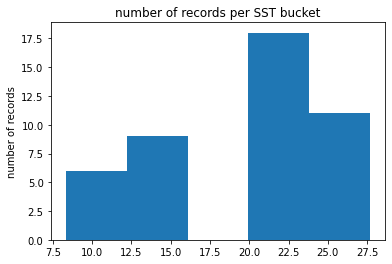

In [43]:
temp = data[["year","sst"]].astype(float)
ax = temp.sst.plot.hist(bins=5)
ax.set_ylabel("number of records")
ax.set_title("number of records per SST bucket");

## Conclusion
From this distribution we can clearly see that the most of the records have an SST in the range of 20-23 degrees however, the literature we referenced suggests their niche tempeature range for optimal growth is 26-30 degrees C. This contrast in the literature v/s OBIS data suggests that a purely random or generic distribution is not present. <- Samples were not purely random and a bias is prevalent.

## References
1. Andrew L. Rhyne, Cortney L. Ohs, Erik Stenn,
Effects of temperature on reproduction and survival of the calanoid copepod Pseudodiaptomus pelagicus,
Aquaculture,
Volume 292, Issues 1–2,
2009,
Pages 53-59,
ISSN 0044-8486,
https://doi.org/10.1016/j.aquaculture.2009.03.041.
(https://www.sciencedirect.com/science/article/pii/S0044848609002725)

2. Ocean Biogeographic Information System ([obis.org](obis.org))